In [1]:
from mesh_poisson_disk_sampling import poisson_disk_sampling
import pyvista as pv
import numpy as np
from PIL import Image

In [2]:
def faces_to_pyvista(faces):
    # converts faces array to pyvista type for visualization
    return np.hstack((np.full((faces.shape[0], 1), 3), faces))

# Intended use

In [3]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [ ]:
# # this is not super efficient, it may take a while for large meshes
# # based on your hardware, this can take up to an hour, run this if you want to load an already sampled set of points from the disk
# vertices = np.load('vertices_bunny.npy')
# faces = np.load('faces_bunny.npy')
# sampled_points = np.load('sampled_points_bunny.npy')

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, num_points = 1000)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh)
plotter.add_points(vertices[sampled_points])
plotter.show()

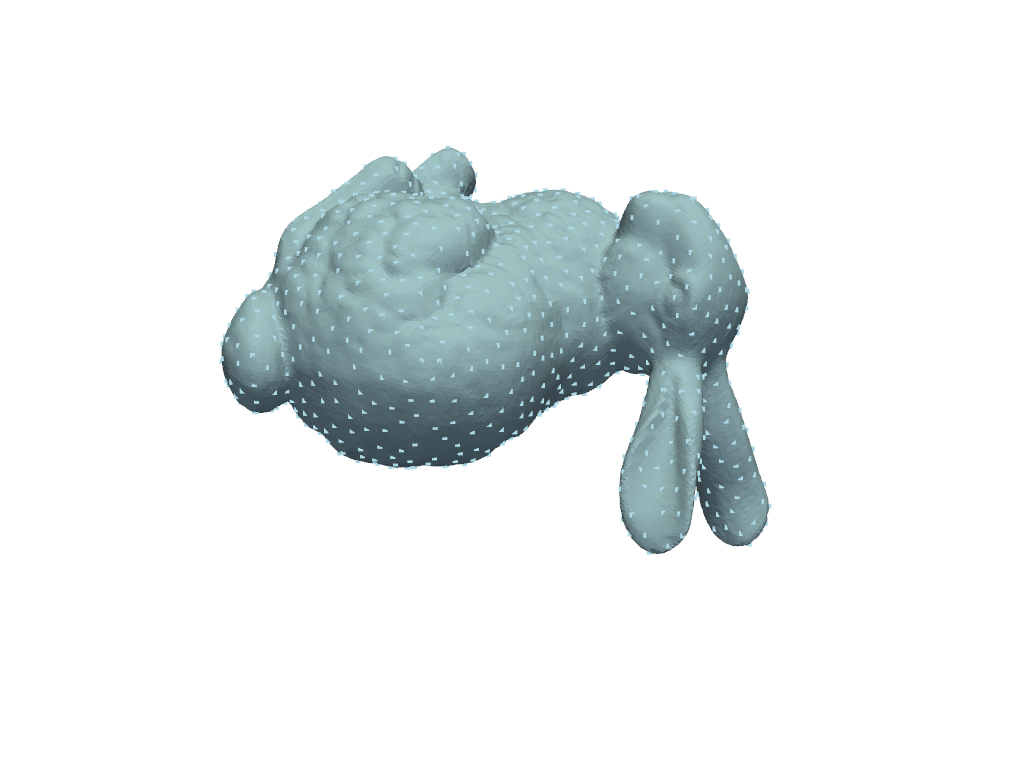

In [17]:
# this is what it looks like
Image.open('bunny.png')

## Special cases

In [4]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

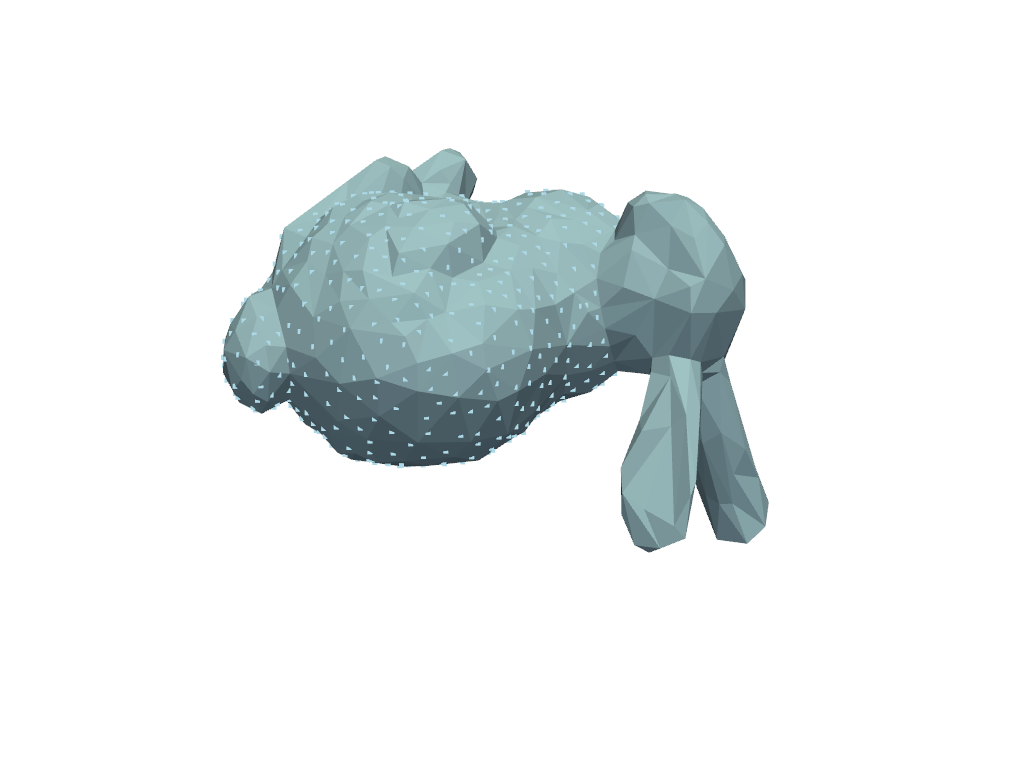

In [5]:
# the algorithm works best if n_faces << points_to_sample, or equivalently, if min_dist>>average_cell_length
# this is because sampling is done by choosing a faces with probability proportional to its area, and then by sampling a point uniformly
# to speed things up, a point from every face is sampled at the same time, and the points are rejected progressively in a face area order
# (this is due to a limitation in the computation of the geodesic distance, which can only be computed between vertices in this library)
# if these conditions are badly violated, weird things can happen, like in this case where the head of the bunny is not covered at all due to a larger face area
Image.open('bunny_coarse_nohead.png')
# generated with:
# vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, num_points = 1000)

In [ ]:
# load an example mesh
mesh = pv.examples.download_bunny_coarse()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

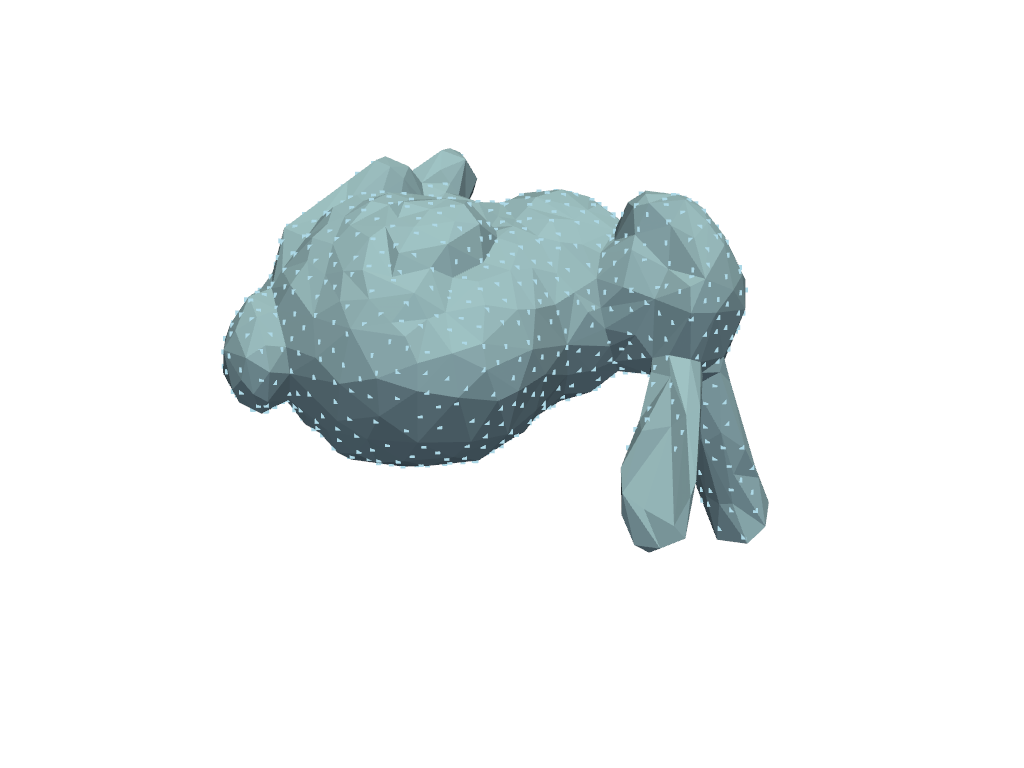

In [20]:
from mesh_poisson_disk_sampling import uniform_sampling

# the issue can be mitigated by upsampling the mesh 
# for example with flat_remeshing() (where each face is split in four smaller subfaces)
# or by seeding the algorithm with already chosen points, e.g. with uniform_sampling()
# (in which case, it's on the user to check whether these input points are far enough from each other)
Image.open('bunny_coarse_seeded.png')
# generated with:
# vertices, faces, seed_vertices = uniform_sampling(vertices, faces, num_points = 20)
# vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, num_points = 1000, seed_vertices=seed_vertices)

# comparison with uniform sampling

In [ ]:
from mesh_poisson_disk_sampling import uniform_sampling

In [ ]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

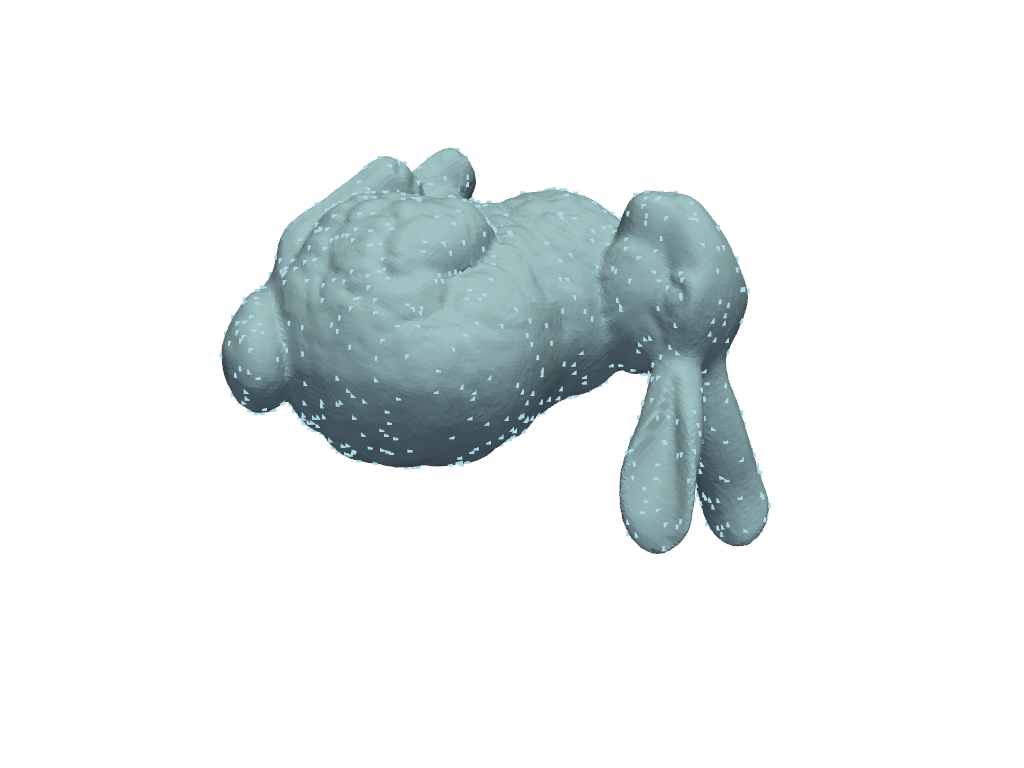

In [28]:
Image.open('bunny_uniform.png')
# generated with
# vertices, faces, sampled_points = uniform_sampling(vertices, faces, num_points = 1000)